In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [2]:
def time_prob(x0,k):
    tmin = (x0**2/(4*k))/86400
    tmax = ((((x0+(285*k))/0.4)**2)/(np.pi*k))//86400
    return tmin,tmax

In [3]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

In [4]:
config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/15June Northern/Beach.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/15June Northern/Beach2.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile2 = os.path.join(paths['out'], fn)

config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/15June Northern/Beach3.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile3 = os.path.join(paths['out'], fn)

config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/15June Northern/Beach4.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile4 = os.path.join(paths['out'], fn)

config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/15June Northern/Beach5.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile5 = os.path.join(paths['out'], fn)


ds = xr.open_dataset(outfile)
ds2 = xr.open_dataset(outfile2)
ds3 = xr.open_dataset(outfile3)
ds4 = xr.open_dataset(outfile4)
ds5 = xr.open_dataset(outfile5)


In [29]:
a=ds.to_dataframe()#.sort_values(by='time')
#time = np.array(a['time'])
#b = np.array(a['beached'])
#beached = [0]
#for be in range(len(b)):
#    beached.append(beached[be]+b[be]) 
#plt.plot(beached)

In [39]:
df=a.loc[0,:]
df.time.iloc[df[df.beached!=0].first_valid_index()]

Timestamp('2016-06-18 14:00:00')

Text(0.5, 1.0, 'Kh vs Grounding PDF')

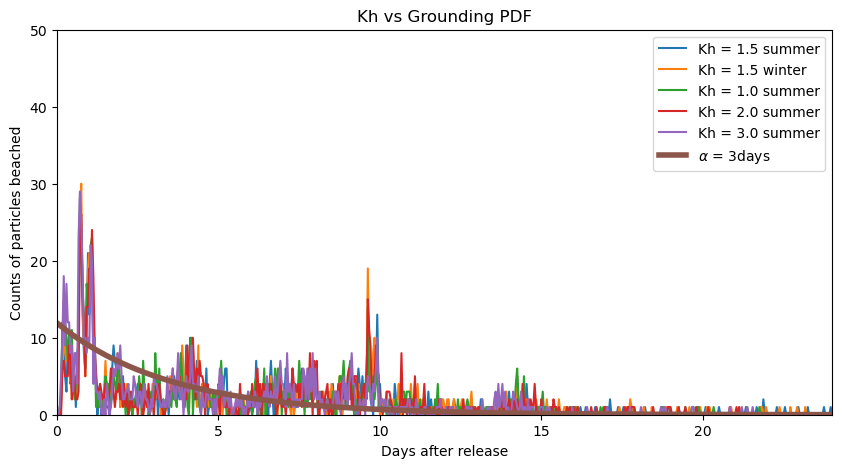

In [17]:
beach = ds.beached
beach2 = ds2.beached
beach3 = ds3.beached
beach4 = ds4.beached
beach5 = ds5.beached
#beach6 = ds6.beached

b,b2,b3,b4,b5,b6 = [],[],[],[],[],[]

for t in range(beach2.shape[1]):
    b.append(np.count_nonzero(beach[:,t] == 1.0)) 
    b2.append(np.count_nonzero(beach2[:,t] == 1.0))
    b3.append(np.count_nonzero(beach3[:,t] == 1.0)) 
    b4.append(np.count_nonzero(beach4[:,t] == 1.0))
    b5.append(np.count_nonzero(beach5[:,t] == 1.0)) 
    #b6.append(np.count_nonzero(beach6[:,t] == 1.0))

d = [b[0]]
d2 = [b2[0]]
d3 = [b3[0]]
d4 = [b4[0]]
d5 = [b5[0]]
#d6 = [b6[0]]

for i in range(1,len(b)):
    d.append(b[i] - (b[i-1]))
    d2.append(b2[i] - (b2[i-1]))
    d3.append(b3[i] - (b3[i-1]))
    d4.append(b4[i] - (b4[i-1]))
    d5.append(b5[i] - (b5[i-1]))
    #d6.append(b6[i] - (b6[i-1]))

time = np.linspace(0,24,577)
time2 = np.linspace(0,24*24,577)
fig,axs = plt.subplots(1,1,figsize=(10,5))
plt.plot(time,d,label='Kh = 1.5 summer')
plt.plot(time,d2,label='Kh = 1.5 winter')
plt.plot(time,d3,label='Kh = 1.0 summer')
plt.plot(time,d4,label='Kh = 2.0 summer')
plt.plot(time,d5,label='Kh = 3.0 summer')
#plt.plot(time,d6,label='Kh = 1.5 2019')
#plt.axvline(x=time_prob(n,1.5)[0],linestyle='--',color='grey')
#plt.axvline(x=time_prob(n,1.5)[1],linestyle='--',color='grey')

alpha = 1/(3.5*24)
p = 1000* alpha * np.exp(-alpha*time2)
plt.plot(time,p,linewidth=4,label=r"$ \alpha$ = 3days")
plt.xlim([0,24])
plt.ylim([0,50])
plt.legend()
plt.xlabel('Days after release')
plt.ylabel('Counts of particles beached')
plt.title('Kh vs Grounding PDF')

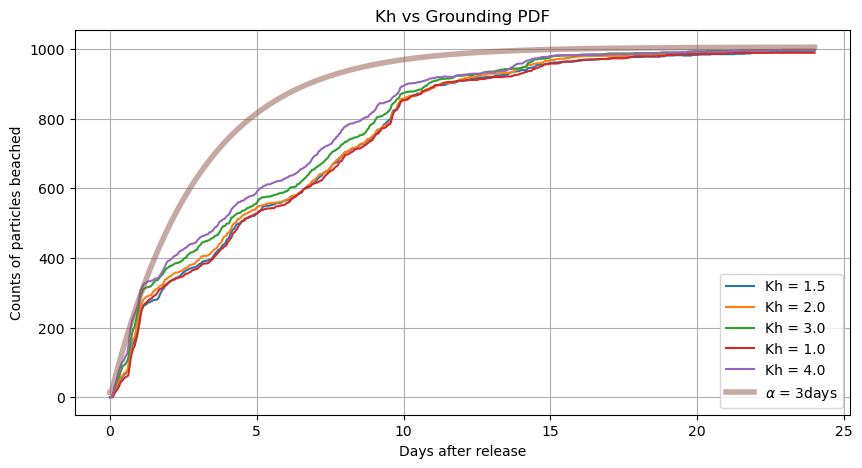

In [23]:
beach = ds.beached
beach2 = ds2.beached
beach3 = ds3.beached
beach4 = ds4.beached
beach5 = ds5.beached
#beach6 = ds6.beached

b,b2,b3,b4,b5,b6 = [],[],[],[],[],[]

for t in range(beach2.shape[1]):
    b.append(np.count_nonzero(beach[:,t] == 1.0)) 
    b2.append(np.count_nonzero(beach2[:,t] == 1.0))
    b3.append(np.count_nonzero(beach3[:,t] == 1.0)) 
    b4.append(np.count_nonzero(beach4[:,t] == 1.0))
    b5.append(np.count_nonzero(beach5[:,t] == 1.0)) 
#    b6.append(np.count_nonzero(beach6[:,t] == 1.0))

dsi = [b[-1]]
dsi.append(b2[-1])
dsi.append(b3[-1])
dsi.append(b4[-1])
dsi.append(b5[-1])
#dsi.append(b6[-1])
mm=np.mean(dsi)

b  = np.array(b[1:])-b[1]
b2  = np.array(b2[1:])-b2[1]
b3  = np.array(b3[1:])-b3[1]
b4  = np.array(b4[1:])-b4[1]
b5  = np.array(b5[1:])-b5[1]
#b6  = np.array(b6[1:])-b6[1]

d = [b[0]]
d2 = [b2[0]]
d3 = [b3[0]]
d4 = [b4[0]]
d5 = [b5[0]]
#d6 = [b6[0]]

time = np.linspace(0,24,576)
time2 = np.linspace(0,24*24,576)
fig2,ax = plt.subplots(1,1,figsize=(10,5))
plt.plot(time,b,label='Kh = 1.5 ')
plt.plot(time,b2,label='Kh = 2.0 ')
plt.plot(time,b3,label='Kh = 3.0 ')
plt.plot(time,b4,label='Kh = 1.0 ')
plt.plot(time,b5,label='Kh = 4.0 ')
#plt.plot(time,b6,label='Kh = 1.5 winter SS')
#plt.axvline(x=time_prob(n,1.5)[0],linestyle='--',color='grey')
#plt.axvline(x=time_prob(n,1.5)[1],linestyle='--',color='grey')

alpha = 1/(3*24)
alpha2 = 1/(4*24)
p = (1000)* alpha * np.exp(-alpha*time2)
p2 = (1000)* alpha2 * np.exp(-alpha2*time2)
#p = (np.sum(b3[0:12]))* alpha * np.exp(-alpha*time2)
pn =[p[0]]
pn2 =[p2[0]]
for i in range(1,len(time2)):
    pn.append(np.sum(p[:i]))
    pn2.append(np.sum(p2[:i]))
plt.plot(time,pn,linewidth=4,label=r"$ \alpha$ = 3days",alpha=0.5)
#plt.plot(time,pn2,linewidth=4,label=r"$ \alpha$ = 6days",alpha=0.5)
#plt.xlim([0,3])
#plt.ylim([0,50])
plt.legend()
plt.xlabel('Days after release')
plt.ylabel('Counts of particles beached')
plt.title('Kh vs Grounding PDF')
plt.grid()

In [19]:
# beach = ds.beached
# beach2 = ds2.beached
# beach3 = ds3.beached
# beach4 = ds4.beached
# beach5 = ds5.beached
# #beach6 = ds6.beached

# b,b2,b3,b4,b5,b6 = [],[],[],[],[],[]

# for t in range(beach.shape[1]):
#     b.append(np.count_nonzero(beach[:,t] == 1.0)) 
#     b2.append(np.count_nonzero(beach2[:,t] == 1.0))
#     b3.append(np.count_nonzero(beach3[:,t] == 1.0)) 
#     b4.append(np.count_nonzero(beach4[:,t] == 1.0))
#     b5.append(np.count_nonzero(beach5[:,t] == 1.0)) 
#     #b6.append(np.count_nonzero(beach6[:,t] == 1.0))

# d = [b[1]]
# d.append(b2[1])
# d.append(b3[1])
# d.append(b4[1])
# d.append(b5[1])
# #d.append(b6[1])
# mm=np.mean(d)

# b  = np.array(b[1:])-b[1]
# b2  = np.array(b2[1:])-b2[1]
# b3  = np.array(b3[1:])-b3[1]
# b4  = np.array(b4[1:])-b4[1]
# b5  = np.array(b5[1:])-b5[1]
# #b6  = np.array(b6[1:])-b6[1]

# d = [b[0]]
# d2 = [b2[0]]
# d3 = [b3[0]]
# d4 = [b4[0]]
# d5 = [b5[0]]
# #d6 = [b6[0]]

# for i in range(1,len(b)):
#     d.append(b[i] - (b[i-1]))
#     d2.append(b2[i] - (b2[i-1]))
#     d3.append(b3[i] - (b3[i-1]))
#     d4.append(b4[i] - (b4[i-1]))
#     d5.append(b5[i] - (b5[i-1]))
#  #   d6.append(b6[i] - (b6[i-1]))

# time = np.linspace(1,25,12)
# time2 = np.linspace(0,24,24)

# fig,axs = plt.subplots(2,3,figsize=(5,8))
# axs[0,0].hist(d,bins=list(np.arange(0,24,2)),label='Kh = 1.5 summer')
# axs[0,1].hist(d2,bins=list(np.arange(0,24,2)),label='Kh = 4.0 summer')
# axs[0,2].hist(d3,bins=list(np.arange(0,24,2)),label='Kh = 1.0 summer')
# axs[1,0].hist(d4,bins=list(np.arange(0,24,2)),label='Kh = 2.0 summer')
# axs[1,1].hist(d5,bins=list(np.arange(0,24,2)),label='Kh = 3.0 summer')
# #axs[2,1].hist(d6,bins=list(np.arange(0,24,2)),label='Kh = 1.5 winter')

# alpha = 1/(3.5/2)
# p = (1000)* alpha * np.exp(-alpha*time2)
# p2 =[]
# for i in range(0,len(p),2):
#     p2.append(np.sum(p[i+1:i+2]))

# for i in range(2):
#     axs[i,0].plot(time2,p,label="Observations SoG")
#     #axs[i,0].set_xlim([-0.5,10.5])
#     axs[i,1].plot(time2,p,label="Observations SoG")
#     #axs[i,1].set_xlim([-0.5,10.5])
#     axs[i,2].plot(time2,p,label="Observations SoG")

# #plt.ylim([0,50])
# #plt.legend()
# #plt.xlabel('Days after release')
# #plt.ylabel('Counts of particles beached')
# #plt.title('Kh vs Observations')

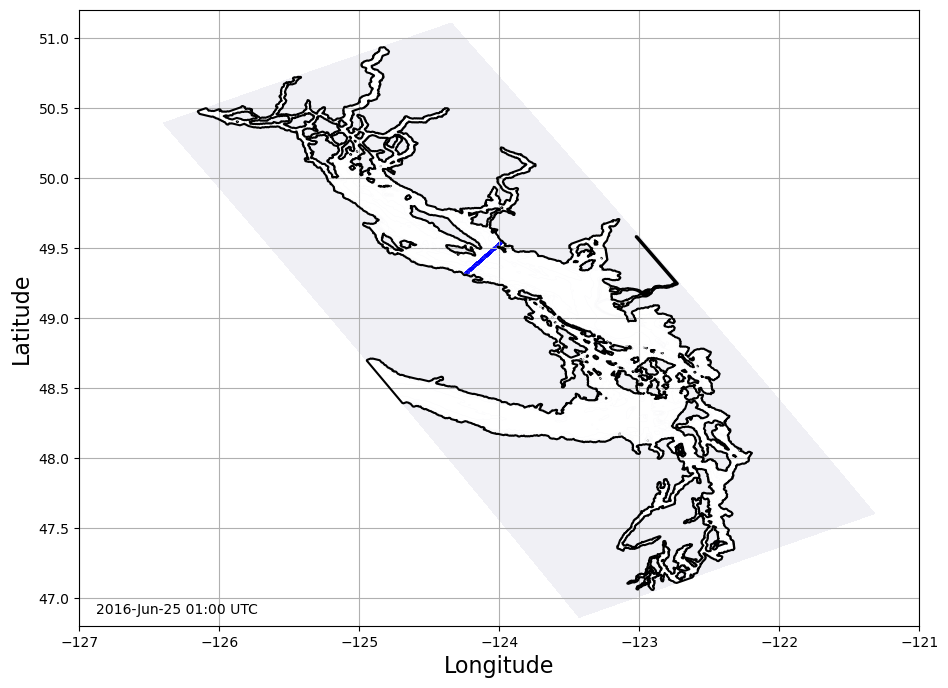

In [20]:
fps=6
anim = mapanimation(outfile,N,n,clon,clat,fps,local)
f = r"/home/jvalenti/MOAD/animations/PETstokes.gif" 
FFwriter = animation.FFMpegWriter()
anim.save(f, writer = FFwriter)

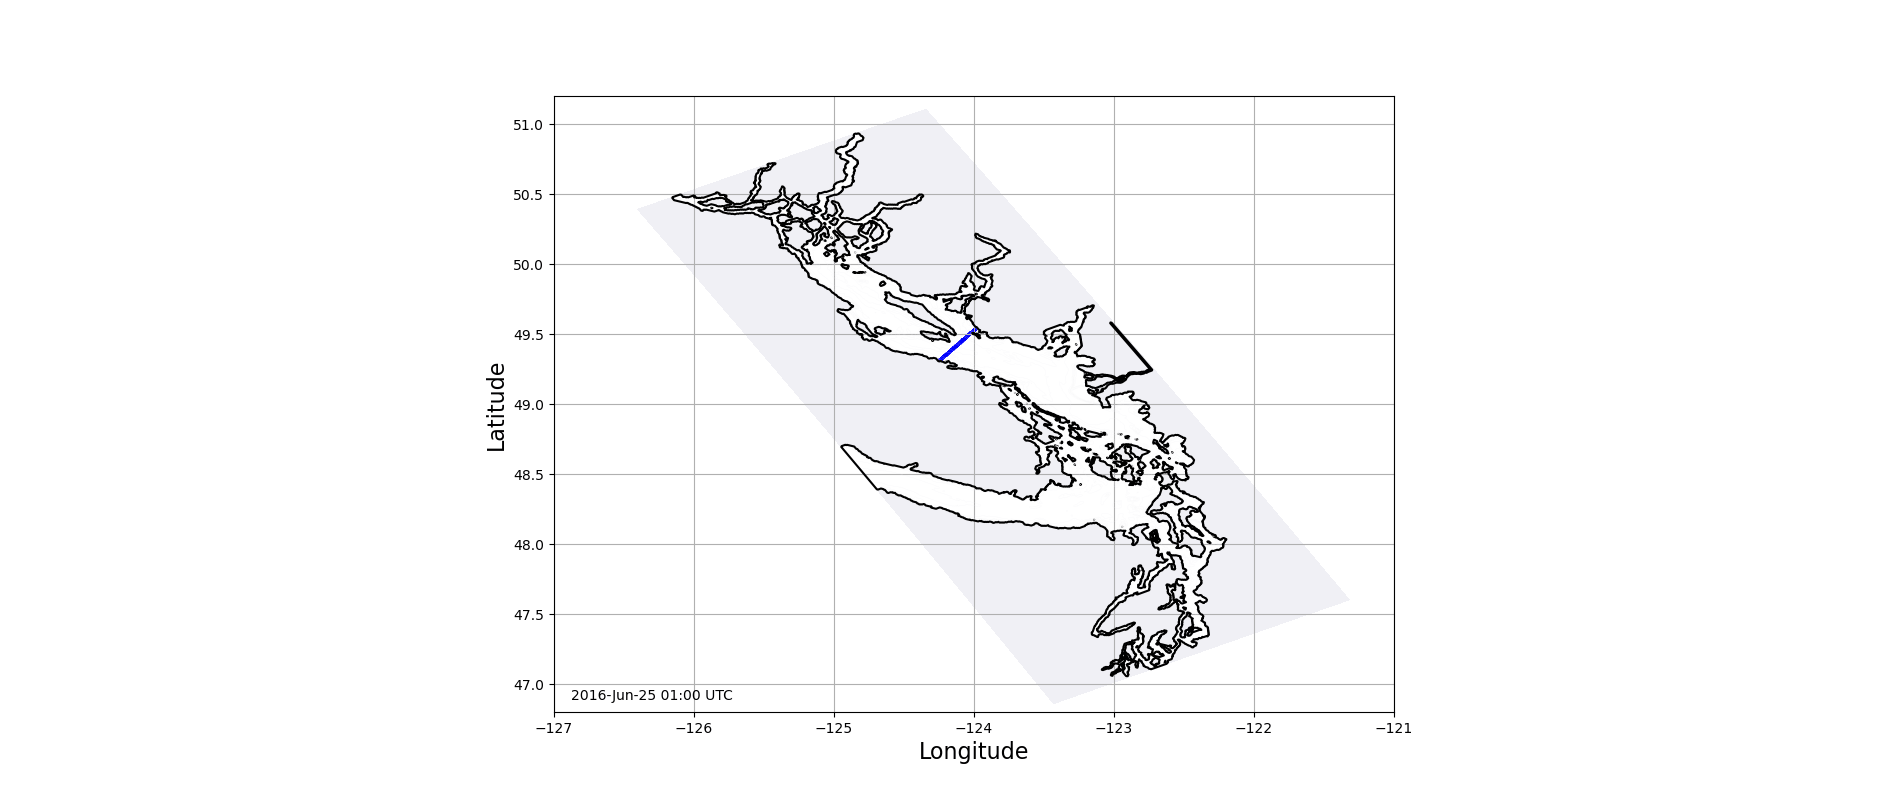

In [21]:
with open(f,'rb') as anim:
     display(Image(anim.read()))